In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
cd /content/drive/MyDrive/Colab Notebooks/GITHUB/colab_ML/ML_CNN

/content/drive/MyDrive/Colab Notebooks/GITHUB/colab_ML/ML_CNN


In [8]:
!git config --global user.email '7373wj@naver.com'
!git config --global user.name 'woonjun'

In [28]:
!git add --all

In [29]:
!git commit -m 'Fashion100 학습 완료'
!git push

[main d944cf2] Fashion100 학습 완료
 3 files changed, 1 insertion(+)
 create mode 100644 ML_CNN/CNN_FASHION.ipynb
 create mode 100644 ML_CNN/dataset/fashion/shoes.png
 create mode 100644 ML_CNN/dataset/fashion/shoes2.jpeg
Enumerating objects: 11, done.
Counting objects: 100% (11/11), done.
Delta compression using up to 2 threads
Compressing objects: 100% (8/8), done.
Writing objects: 100% (8/8), 38.56 KiB | 4.28 MiB/s, done.
Total 8 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/woonjun/colab_ML.git
   7a45eba..d944cf2  main -> main


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

4422102/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [ ]:
%tensorflow_version 2.x

import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0


In [25]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

with tf.device('/device:GPU:0'):
  model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])


  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


  history = model.fit(train_images, train_labels, epochs=5, validation_data = (test_images,test_labels))

loss, accuracy = model.evaluate(test_images, test_labels)
print(loss, accuracy)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4737 - accuracy: 0.8313 - val_loss: 0.4170 - val_accuracy: 0.8502
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3580 - accuracy: 0.8692 - val_loss: 0.3795 - val_accuracy: 0.8620
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3238 - accuracy: 0.8805 - val_loss: 0.3647 - val_accuracy: 0.8695
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2972 - accuracy: 0.8897 - val_loss: 0.3536 - val_accuracy: 0.8702
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3400 - accuracy: 0.8776
0.34004539251327515 0.8776000142097473


In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

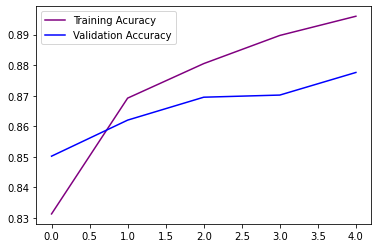

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure()
plt.plot(acc,color = 'purple',label = 'Training Acuracy')
plt.plot(val_acc,color = 'blue',label = 'Validation Accuracy')
plt.legend()

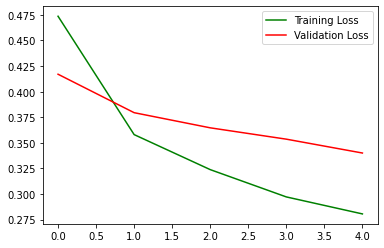

In [27]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss,color = 'green',label = 'Training Loss')
plt.plot(val_loss,color = 'red',label = 'Validation Loss')
plt.legend()

In [23]:
root = '/content/drive/MyDrive/Colab Notebooks/GITHUB/colab_ML/ML_CNN/dataset/fashion/shoes2.jpeg'
img = cv2.imread(root,cv2.IMREAD_GRAYSCALE)
img = cv2.resize(255-img,(28,28),interpolation=cv2.INTER_NEAREST)
imgRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)/255
imgRGB = imgRGB.reshape(-1,28,28)

print(np.argmax(model.predict(imgRGB)[0]))

1/1 [==============================] - 0s 20ms/step
7


In [24]:
print(img)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   2   0   1   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   5  20   1   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  24  15   3   5   3   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1  21 115   0   3   1   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  16 137 210 179   4  89   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  13   0 168 170 228 163 158 171 138   6   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 205 223 226 161 157 161 163 161 165  13  26   0   